In [8]:
import pandas as pd
import numpy as np
import calculate_cleavage_rate as clv
%matplotlib inline 
import matplotlib.pylab as plt
import seaborn as sns
sns.set_style('ticks')
current_colors = sns.color_palette()
reload(clv)
import sys
import Nucleaseq_data_processing as processing
reload(processing)
import read_model_ID as model
reload(model)

<module 'read_model_ID' from '../code_general/read_model_ID.pyc'>

In [13]:
model_ID = 'Clv_Saturated_general_energies_v2+general_energies_no_kPR'; parnum = '44' 

filename = 'fit_13_6_2019_sim_2.txt'
path = '../fits_Stijn/13_6_2019/'
data = pd.read_table(path+filename,index_col=False)
chi = data.loc[:,'Potential']
T = data.loc[:,'Temperature']
final_par = data.loc[np.argmin(chi),'Parameter 1':'Parameter '+parnum]
parameters = np.array(final_par.values)

model_ID,_,parameters,_ = model.combined_model(parameters,model_ID)

Text(29.125,0.5,'Cleavage rate (Hz) time points')

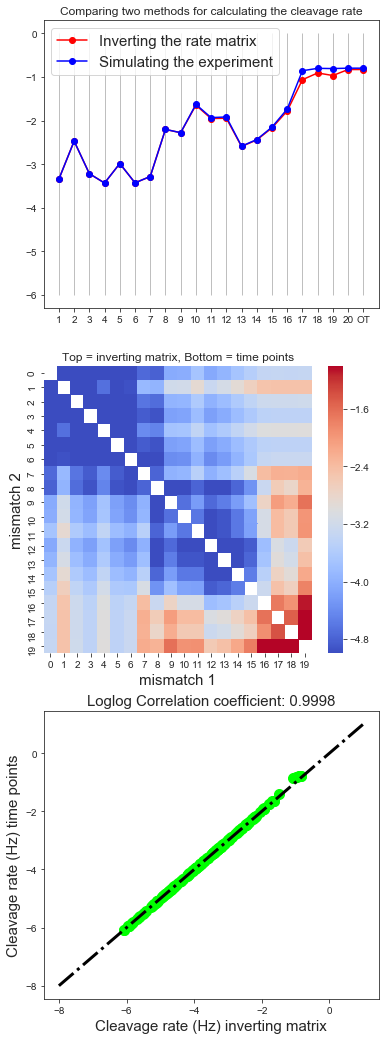

In [21]:
reload(clv)
k_fast = np.zeros(21)
k_slow = np.zeros(21)
for i in range(1,21):
    mismatch_positions = [i]
    k_fast[i-1] = np.log10(clv.calc_clv_rate_fast(parameters,model_ID,mismatch_positions))
    k_slow[i-1] = np.log10(clv.calc_clv_rate(parameters,model_ID,mismatch_positions))
k_fast[-1] = np.log10(clv.calc_clv_rate_fast(parameters,model_ID,[]))
k_slow[-1] = np.log10(clv.calc_clv_rate(parameters,model_ID,[]))

f,ax = plt.subplots(3,1,sharey=False,figsize=[6,18])
    
ax[0].plot(range(1,22),k_fast,marker='o',color='red')
ax[0].plot(range(1,22),k_slow,marker='o',color='blue')
ax[0].set_xticks(range(1,22));
ax[0].set_xticklabels(range(1,21)+['OT'])
ax[0].vlines(range(1,22),-6,0,linewidth=0.5,color='grey')
ax[0].legend(['Inverting the rate matrix','Simulating the experiment'],fontsize=15)
ax[0].set_title('Comparing two methods for calculating the cleavage rate')

k_dmm = np.zeros([20,20])
for i in range(1,20):
    for j in range(i+1,21):
        mismatch_positions = [i,j]
        k_dmm[i-1][j-1] = np.log10(clv.calc_clv_rate_fast(parameters,model_ID,mismatch_positions))
        k_dmm[j-1][i-1] = np.log10(clv.calc_clv_rate(parameters,model_ID,mismatch_positions))
        
k_df = pd.DataFrame(k_dmm, index=range(1, 21), columns=range(1, 21))
for i in range(1,21):
    k_df[i].loc[i]=np.nan
    
sns.heatmap(k_dmm, cmap='coolwarm', cbar=True,ax=ax[1],vmin=-5,vmax=-1)
ax[1].set_xlabel('mismatch 1', fontsize=15)
ax[1].set_ylabel('mismatch 2', fontsize=15)
ax[1].set_title('Top = inverting matrix, Bottom = time points')

fast = []
slow = []

for i in range(len(xdata)):
    fast.append(np.log10(clv.calc_clv_rate_fast(parameters,model_ID,xdata[i])))
    slow.append(np.log10(clv.calc_clv_rate(parameters,model_ID,xdata[i])))
        
        
ax[2].plot(fast,slow,marker='o',markersize=10,color='lime',linewidth=0.0)
ax[2].plot([-8,1],[-8,1],'k-.',linewidth=3)
#ax[2].set_axis([-8,1,-8,1])
ax[2].set_title('Loglog Correlation coefficient: ' + str(np.round(np.corrcoef([fast,slow])[0][1],4)), fontsize=15)
ax[2].set_xlabel('Cleavage rate (Hz) inverting matrix',fontsize=15)
ax[2].set_ylabel('Cleavage rate (Hz) time points',fontsize=15)